In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-charges-dataset/insurance_charges.csv


# Import Packages

In [2]:
# Imported packages
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/kaggle/input/insurance-charges-dataset/insurance_charges.csv")

In [4]:
#check starting 5 values of the data
df.head()

,Age,Gender,Bmi,Children,Smoker,region_,#charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# check no. of rows and columns
df.shape

(1338, 7)

In [6]:
# check columns
df.columns = df.columns.str.lower()

In [7]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region_', '#charges'], dtype='object')

In [8]:
df = df.rename(columns = {"region_" : "region",'#charges' : 'charges'})

In [9]:
# check row count of rows.
print(f"The row count of the data : {df.shape[0]}")

The row count of the data : 1338


In [10]:
# Check if data has null values
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# Describe your data into five point summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# check if values have duplicated values.
df.duplicated().sum()

1

In [13]:
# drop duplictaed values.
df.drop_duplicates(inplace = True)

In [14]:
# check again if the duplicated values got dropped.
df.duplicated().sum()

0

In [15]:
df[['gender','region','smoker']].value_counts(normalize = True)*100

gender  region     smoker
female  southwest  no        10.545999
        southeast  no        10.396410
        northwest  no        10.097233
male    southeast  no        10.022438
female  northeast  no         9.872850
male    northwest  no         9.798055
        southwest  no         9.424084
        northeast  no         9.349289
        southeast  yes        4.113687
        northeast  yes        2.842184
        southwest  yes        2.767390
female  southeast  yes        2.692595
        northeast  yes        2.169035
        northwest  yes        2.169035
male    northwest  yes        2.169035
female  southwest  yes        1.570681
dtype: float64

In [16]:
# Import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
# Check value counts for the column gender
df.value_counts("gender")

gender
male      675
female    662
dtype: int64

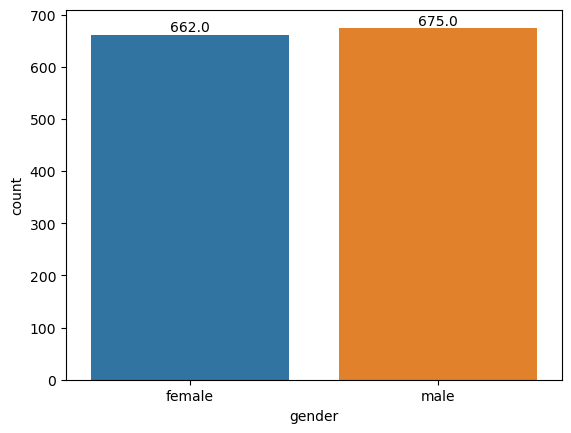

In [18]:
ax = sns.countplot(data=df,x = 'gender')
# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# No of males and females available in the dataset

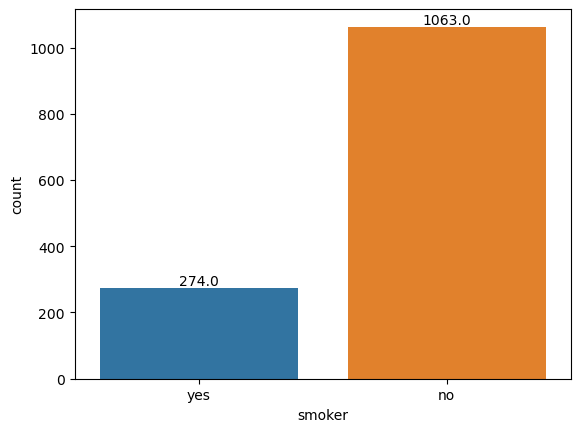

In [19]:
ax = sns.countplot(data=df,x = 'smoker')
# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# no. of smokers and non-smokers

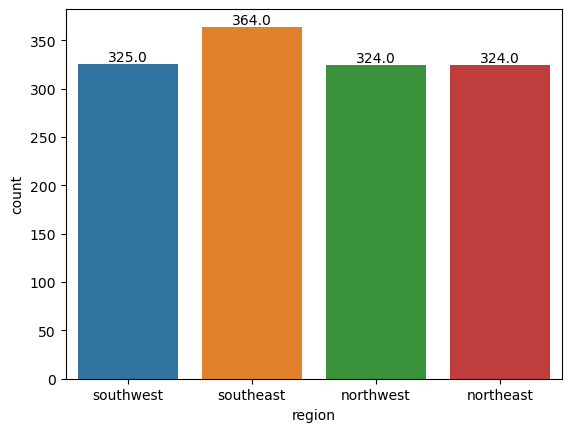

In [20]:
ax = sns.countplot(data=df,x= 'region')

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [21]:
df1 = pd.DataFrame()

df1['gender'] = df['gender']
df1['smoker'] = df['smoker']
df1['region'] = df['region']

df1.head(5)

,gender,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


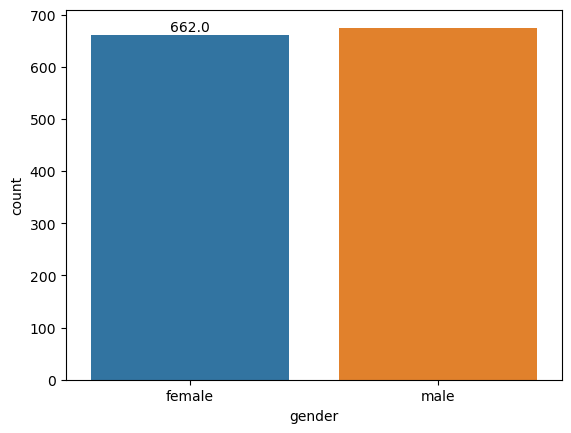

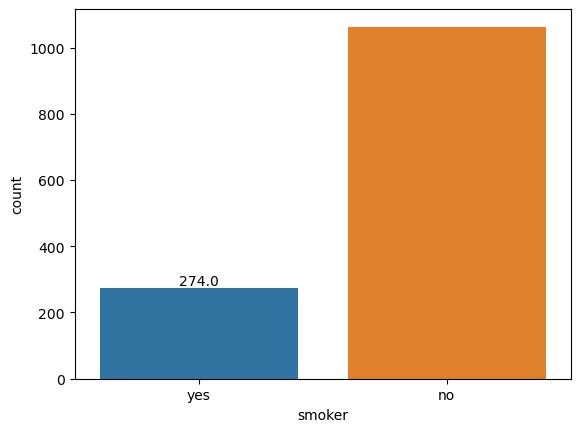

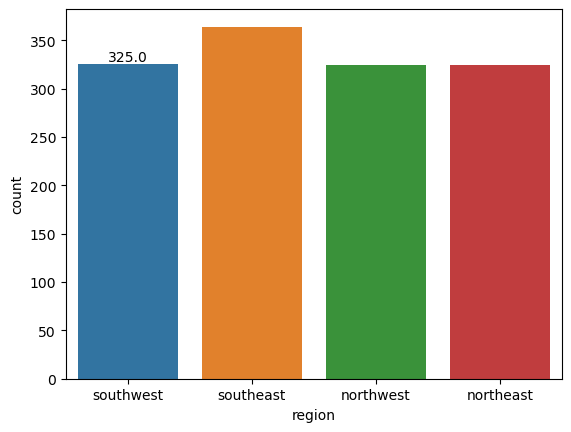

In [22]:
for i in df1:
  ax = sns.countplot(data = df1 , x = i)
  # Add value labels
  for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.show()

In [23]:
from sklearn import preprocessing

Label encoding is a technique used in machine learning and data analysis to convert categorical variables into numerical format. It is particularly useful when working with algorithms that require numerical input, as most machine learning models can only operate on numerical data.

In [24]:
labelencoder = preprocessing.LabelEncoder()

In [25]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['gender'] = labelencoder.fit_transform(df['gender'])
df['region'] = labelencoder.fit_transform(df['region'])

In [27]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [28]:
df.corr()['charges'].sort_values(ascending = False)

# 1 positive strong correlation
# -1 negative strong correlation
# 0 no correlation

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
gender      0.058044
region     -0.006547
Name: charges, dtype: float64

<Axes: >

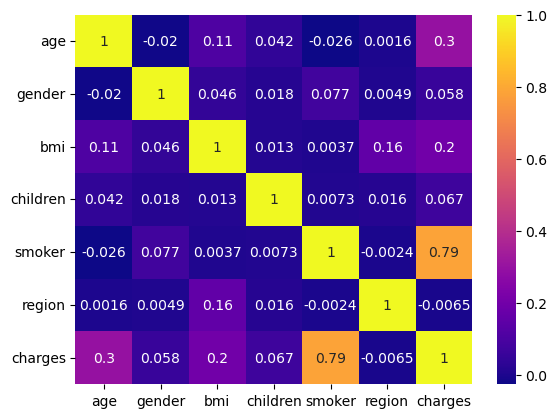

In [29]:
sns.heatmap(df.corr(),annot = True, cmap = 'plasma')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


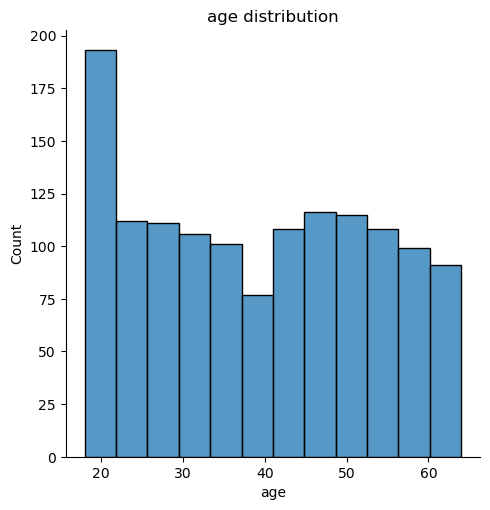

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


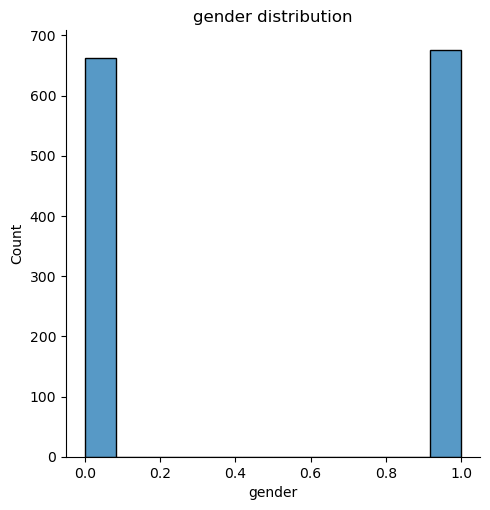

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


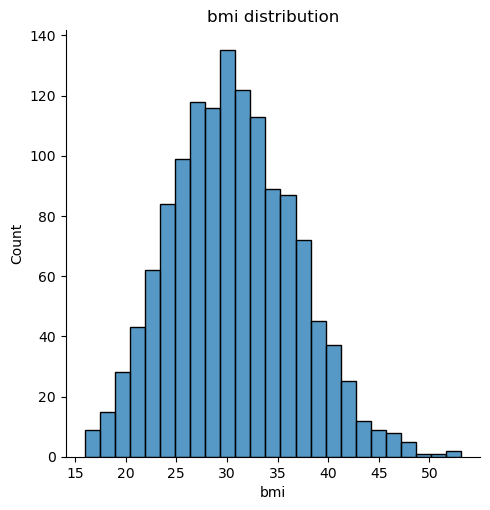

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


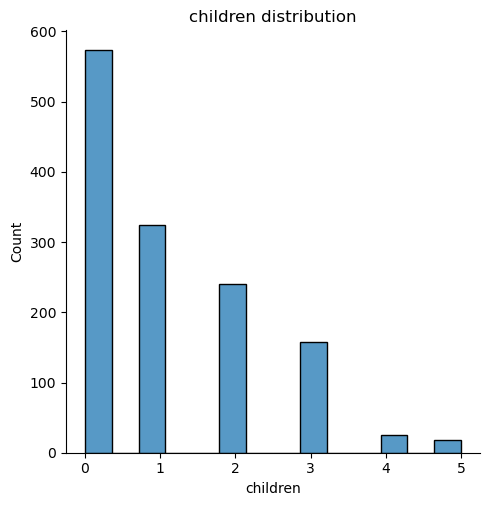

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


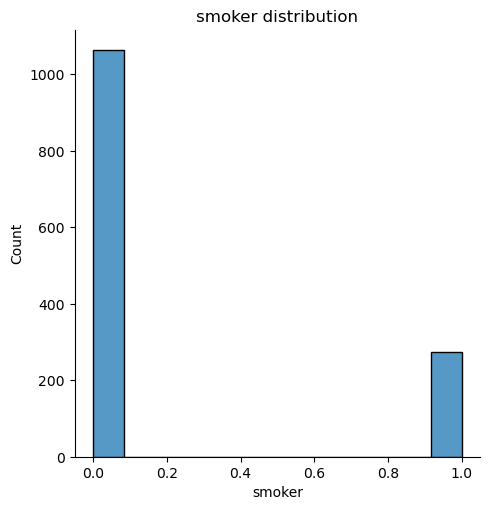

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


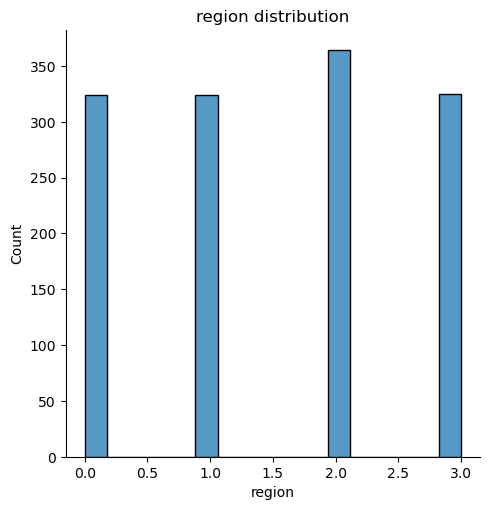

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


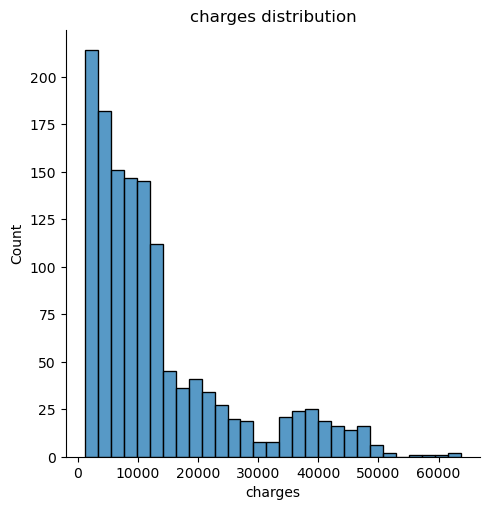

In [30]:
for i in df.columns:
  sns.displot(df[i])
  plt.title( i + " " + "distribution")
  plt.show()

  # bmi values have normal distribution
  #

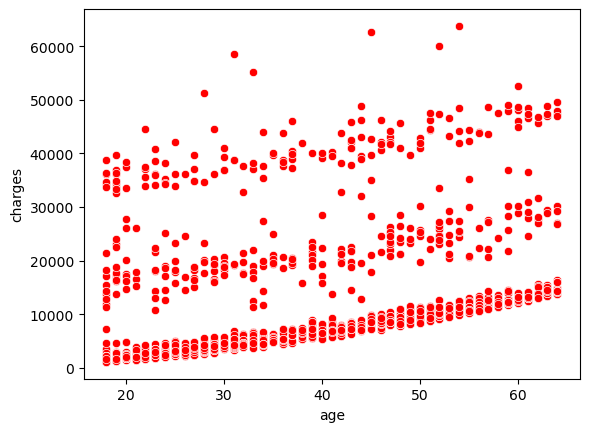

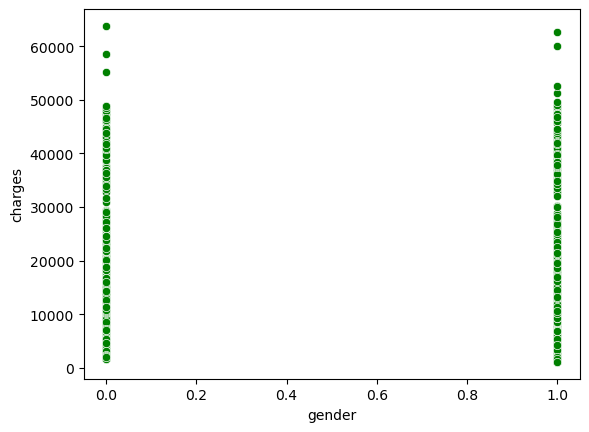

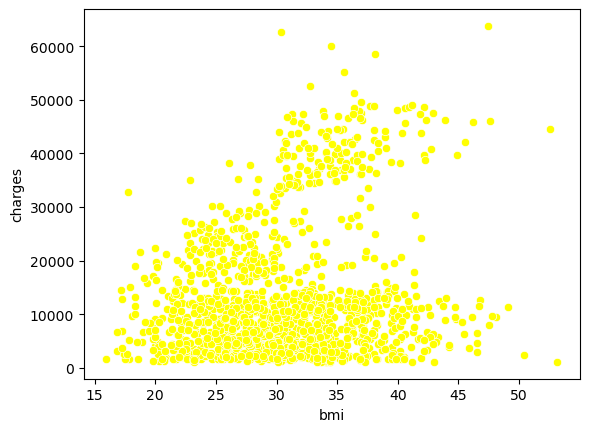

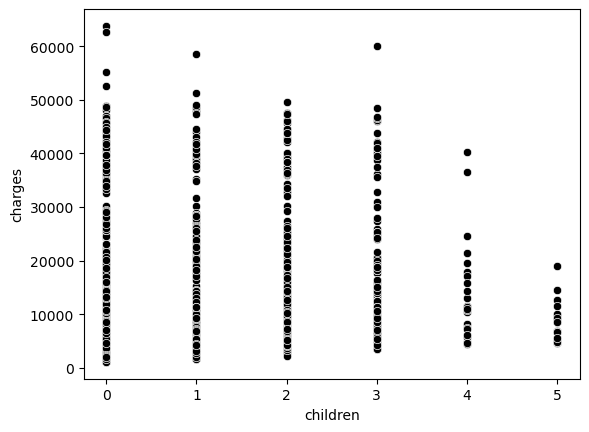

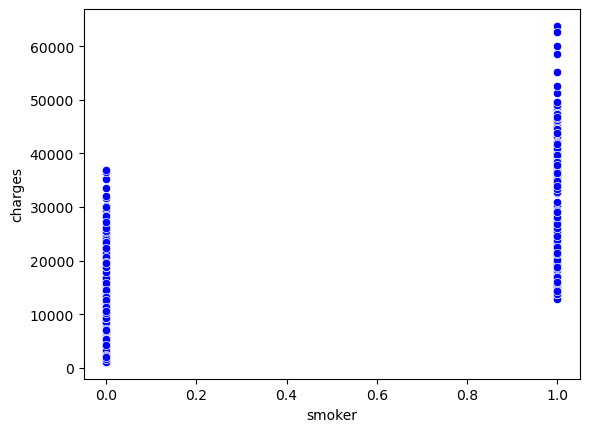

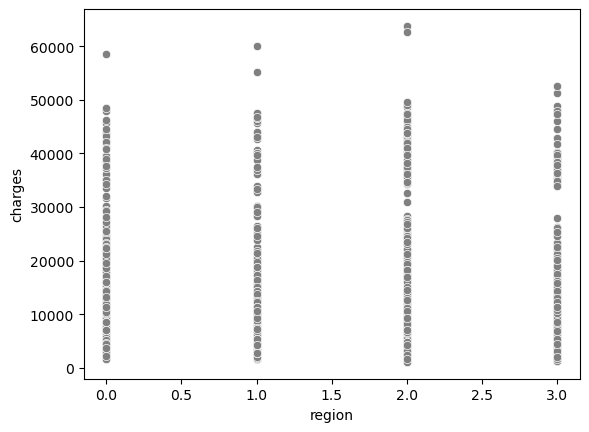

In [31]:
colorsforx = ['Red','Green','Yellow','Black','Blue','Grey']
colorchanger = 0

for i in df.columns[:-1]:
  sns.scatterplot(data = df, x =i , y = 'charges', color = colorsforx[colorchanger])
  plt.show()
  colorchanger +=1

#

In [32]:
# ML
from sklearn.model_selection import train_test_split
x = df.drop('charges',axis = 1)
y = df['charges']

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30)

In [34]:
# scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test =  scaler.fit_transform(x_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def modelresults(predictions):
  print(f"Mean absolute error on model is : {mean_absolute_error(y_test,predictions)}")
  print(f"Root mean squared error on model is : {mean_squared_error(y_test,predictions)}")

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(scaled_x_train,y_train)

LinearRegression()

In [37]:
lr = model.predict(scaled_x_test)
modelresults(lr)

Mean absolute error on model is : 4122.374982540829
Root mean squared error on model is : 33500108.72625276


In [38]:
 from sklearn.svm import SVR
 from sklearn.model_selection import GridSearchCV
 svr_model = SVR()
 param_gridsvr = {'C':[0.001,0.01,0.1,0.5,1],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[2,3,4,5]}
gridsvr = GridSearchCV(svr_model,param_gridsvr)
gridsvr.fit(scaled_x_train,y_train)
print(f"Best parameter for model is : {gridsvr.best_params_}")

Best parameter for model is : {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [39]:
pred_gridsvr = gridsvr.predict(scaled_x_test)
modelresults(pred_gridsvr)

Mean absolute error on model is : 7669.8999782578085
Root mean squared error on model is : 143432899.91843984


In [40]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()
param_gridfr = {'bootstrap':[True],'max_depth':[5,10,15], 'max_features':['auto','log2'],'n_estimators':[2,3,4,5,6,7,8,9,10]}
gridrfr = GridSearchCV(rfrmodel, param_gridfr)
gridrfr.fit(scaled_x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [41]:
predsgridrfr = gridrfr.predict(scaled_x_test)
modelresults(predsgridrfr)

Mean absolute error on model is : 2469.971856950059
Root mean squared error on model is : 18364131.40135018


In [42]:
x.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [43]:
column_iterate = 1
for index in x.columns:
  mean = df[index].mean()
  print(f"The mean of the column {column_iterate} is {mean}")
  column_iterate += 1

The mean of the column 1 is 39.222139117427076
The mean of the column 2 is 0.5048616305160808
The mean of the column 3 is 30.66345175766642
The mean of the column 4 is 1.0957367240089753
The mean of the column 5 is 0.2049364248317128
The mean of the column 6 is 1.5160807778608825


In [44]:
new_customer = np.array([39,0,30,1,0,1])

In [45]:
gridrfr.predict(new_customer.reshape(1,-1))

array([16151.90778286])

In [46]:
print(f"The insurance cost of new cutomer is {gridrfr.predict(new_customer.reshape(1,-1))}")

The insurance cost of new cutomer is [16151.90778286]
